In [38]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing.imputation import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
# from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os
import random
import matplotlib.pyplot as plt

In [39]:
def makeUserTarget(df, user):
    aux = []
    for _, row in df.iterrows():
        if row.our_data == 0:
            if(np.floor(row.SessionID/100).astype(int) == user):
                aux.append(1)
            else:
                aux.append(0)
        else:
            if 'Diego' in row.SessionID and user == 'Diego':
                aux.append(1)
            elif 'Toto' in row.SessionID and user == 'Toto':
                aux.append(1)
            elif (('Jo' in row.SessionID) or ('jo' in row.SessionID)) and user == 'Jo':
                aux.append(1)
            else:
                aux.append(0)
    df['target'] = aux

In [40]:
def separateIntoTrainAndTest(df, test_sessions = []):
    targetSessionIds = list(df[df.target == 1].SessionID.unique())
    targetChoosenSession = random.choice(targetSessionIds)
    notTargetSessionIds = list(df[df.target == 0].SessionID.unique())
    notTargetChoosenSessions = test_sessions
    for i in range(2):
        notTargetChoosenSession = random.choice(notTargetSessionIds) 
        notTargetChoosenSessions.append(notTargetChoosenSession)
        notTargetSessionIds.remove(notTargetChoosenSession)
    df_train = df[(df.SessionID != targetChoosenSession) & (~df.SessionID.isin(notTargetChoosenSessions))]
    df_test = df[(df.SessionID == targetChoosenSession) | (df.SessionID.isin(notTargetChoosenSessions))]
    
    return df_train, df_test

In [41]:
def getOurDataUsers(row):
    if 'Diego' in row.SessionID :
        return('Diego')
    elif 'Toto' in row.SessionID:
        return('Toto')
    elif ('Jo' in row.SessionID) or ('jo' in row.SessionID):
        return('Jo')

In [42]:
file_name = '10secs_aggregated_features'
our_data_file_name = 'our_data_aggregated_features'
to_drop = []
df = pd.read_csv('./' + file_name + '.csv')
our_data_df = pd.read_csv('./' + our_data_file_name + '.csv')
df['our_data'] = 0
our_data_df['our_data'] = 1

In [43]:
users = (np.floor(df.SessionID/100).astype(int)).unique()
our_data_users = our_data_df.apply(getOurDataUsers,axis=1)

In [44]:
df = df.append(our_data_df,ignore_index=True)

In [45]:
#df = df[df.our_data != 0]

In [46]:
sessionsToDrop = ['Diego01']

In [47]:
df = df[~df.SessionID.isin(sessionsToDrop)]

In [48]:
#user = random.choice(users)
user = 'Diego'
makeUserTarget(df, user)

In [49]:
#to_drop =  ['our_data','Contact_size_mean','Contact_size_std'] 
#to_drop =  ['our_data','Mag_Z_mean','Mag_X_mean','Mag_Y_mean','Mag_Y_std','Mag_Z_std','Mag_X_std']
to_drop =  ['our_data','Mag_Z_mean','Mag_X_mean','Mag_Y_mean','Mag_Y_std','Mag_Z_std','Mag_X_std','Contact_size_mean','Pressure_mean','Pressure_std','Contact_size_std']

In [50]:
clf = xgb.XGBClassifier(n_estimators=90, max_depth=9, random_state=31, colsample_bytree=0.6, colsample_bylevel=0.5, learning_rate=0.11, subsample=0.9)
#clf = RandomForestClassifier()

In [51]:
df = df.set_index(["SessionID", 'WindowNumber']).drop(to_drop, axis=1)

In [52]:
x_train, y_train = df.drop("target", axis=1), df["target"]

In [53]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=0.6, gamma=0, learning_rate=0.11, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=31, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

<Figure size 432x288 with 0 Axes>

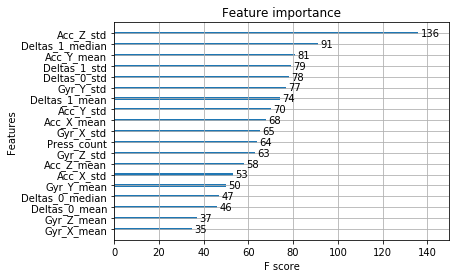

<Figure size 432x288 with 0 Axes>

In [54]:
xgb.plot_importance(clf)
plt.figure()

In [55]:
clf.save_model(user + '.model.bin')

In [62]:
df

Acc_X_mean  Acc_X_std  Acc_Y_mean  Acc_Y_std  \
SessionID WindowNumber                                                 
10066902  0.0            -0.179419   0.209539    7.686917   0.199221   
          1.0            -0.435381   0.395288    7.915447   0.183345   
          2.0            -0.400635   0.236658    8.201220   0.155821   
          3.0            -0.233202   0.201974    8.023303   0.165227   
          4.0            -0.231597   0.178185    7.948692   0.171841   
          5.0            -0.349661   0.167055    8.018333   0.114147   
          6.0            -0.230034   0.154615    8.051887   0.070129   
          7.0            -0.123536   0.192902    8.078770   0.144324   
          8.0            -0.353926   0.216102    8.036291   0.147267   
          9.0            -0.438989   0.263648    8.081441   0.146724   
          10.0           -0.407971   0.214421    8.111480   0.106804   
          11.0           -0.226722   0.198228    8.023471   0.157799   
          12.0           -0.110179   0.194801    8.041930   0.135243   
          13.0           -0.260722   0.227255    8.041030   0.154225   
          14.0           -0.287027   0.212565    8.012351   0.111156   
          15.0           -0.276713   0.214206    8.052876   0.118065   
          16.0           -0.289187   0.272359    7.981141   0.184025   
          17.0           -0.213394   0.324063    7.894060   0.192119   
          18.0           -0.071383   0.202368    8.011259   0.123731   
          19.0           -0.318038   0.267130    7.901170   0.170171   
          20.0           -0.290685   0.248501    7.922689   0.146022   
          21.0           -0.178019   0.248853    7.890932   0.153687   
          22.0           -0.218974   0.318530    7.882372   0.196257   
          23.0           -0.281207   0.296175    7.887080   0.198305   
          24.0           -0.296197   0.356940    8.061046   0.269709   
          25.0           -0.365999   0.309350    7.864422   0.194217   
          26.0           -0.358849   0.313652    8.024548   0.183041   
          27.0           -0.326944   0.220080    8.176226   0.175121   
          28.0           -0.199720   0.276291    8.053937   0.162210   
          29.0           -0.236024   0.276769    7.929257   0.184044   
...                            ...        ...         ...        ...   
jo9       34.0           -0.252935   0.319475    6.148740   0.267379   
          35.0           -0.228013   0.248138    6.044655   0.141193   
          36.0           -0.230303   0.274137    6.067577   0.213504   
          37.0           -0.273322   0.276662    6.085371   0.177796   
          38.0           -0.486959   0.480059    6.238622   0.271470   
          39.0           -0.455089   0.356160    6.108712   0.298390   
          40.0           -0.403193   0.540048    5.957444   0.341571   
          41.0           -0.116933   0.296167    6.145092   0.259298   
          42.0           -0.257808   0.294473    6.157255   0.223662   
          43.0           -0.234076   0.307440    6.214716   0.251488   
          44.0           -0.272498   0.375176    6.190400   0.252295   
          45.0           -0.237064   0.385556    6.174177   0.258432   
          46.0           -0.220956   0.542748    6.136090   0.326455   
          47.0           -0.071979   0.288446    6.070403   0.243500   
          48.0            0.052586   0.281148    5.985188   0.277011   
          49.0           -0.447850   0.512662    5.944650   0.279793   
oscar1    0.0             0.867515   1.058154    8.153636   0.887981   
          1.0             1.387804   0.631774    7.729096   0.656913   
          2.0             1.659551   0.729321    7.850341   0.667268   
          3.0             1.646406   0.575056    7.959581   0.550259   
          4.0             1.775463   0.499823    7.915585   0.427538   
          5.0             1.874708   0.441956    7.563819   0.414704   
          6.0             2.066301   0.532336    7.718773   0.79